In [2]:











# Importation des bibliothèques nécessaires
import numpy as np
import librosa as lr

import pandas as pd
import os
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt



# numpy: Fournit un support pour les tableaux et matrices multidimensionnels,
# librosa: Utilisée pour l'analyse audio . Permet, par exemple,
# l'extraction de caractéristiques, la transformation de signaux audio, spectrogramme, ....
# os: Fournit des fonctions pour interagir avec le système d'exploitation, afin d'accéder le chemins de nos données
# comme la gestion des fichiers et des chemins.
# librosa.display: Utilisé pour afficher des représentations audio comme des
# spectrogrammes.
# soundfile: Utilisé pour lire et écrire des fichiers audio, en particulier
# pour des formats comme WAV.
# matplotlib.pyplot: Utilisé pour créer des graphiques et des visualisations.


Ce code transforme un signal audio en un spectrogramme. Le spectrogramme est ensuite converti en décibels pour une meilleure interprétation et utilisation dans des applications telles que l'analyse audio ou l'apprentissage automatique.

In [3]:


np.set_printoptions(suppress=True, precision=8)

# Fonction pour extraire des caractéristiques d'un fichier audio
def extract_features(audio_path):
    # Lecture du fichier audio avec soundfile
    sig, sr = sf.read(audio_path)

    # Application de la transformée de Fourier à court terme (STFT) sur le signal audio
    # pour obtenir un spectrogramme. n_fft=650 définit la taille de la fenêtre pour la transformée.
    tf_sig = lr.stft(sig, n_fft=650)

    # Conversion des valeurs complexes en valeurs d'amplitude (valeurs absolues)
    tf_sig = np.abs(tf_sig)

    # Conversion des amplitudes en décibels pour obtenir le spectrogramme en décibels,
    # qui est une représentation plus intuitive de l'ampleur du son.
    resultat = lr.amplitude_to_db(tf_sig, ref=np.min)

    # Typecast du résultat en float32 pour uniformiser le type de données
    resultat = resultat.astype('float32')

    # Redimensionnement du résultat pour qu'il corresponde à la forme attendue
    # pour d'autres traitements ou pour un modèle d'apprentissage automatique.
    return resultat.reshape(resultat.shape[0], resultat.shape[1], 1)


In [5]:
# Ici des tests pour voir la fonction extract_features si ça fonctionne bien
file="audio_example.wav"
file0="00000-JAM.wav"
file1="00001-JAM.wav"
file5="00005-JAM.wav"
file6="00006-JAM.wav"
resultat0 = extract_features(file0)
resultat1 = extract_features(file1)
resultat5 = extract_features(file5)
resultat6 = extract_features(file6)
resultat0.shape # la taille de chaque spectrogramme

(326, 317, 1)

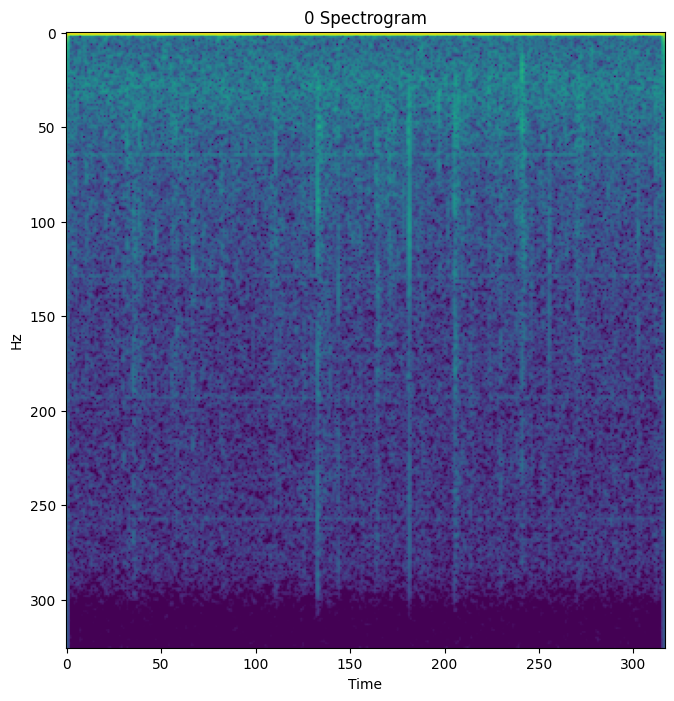

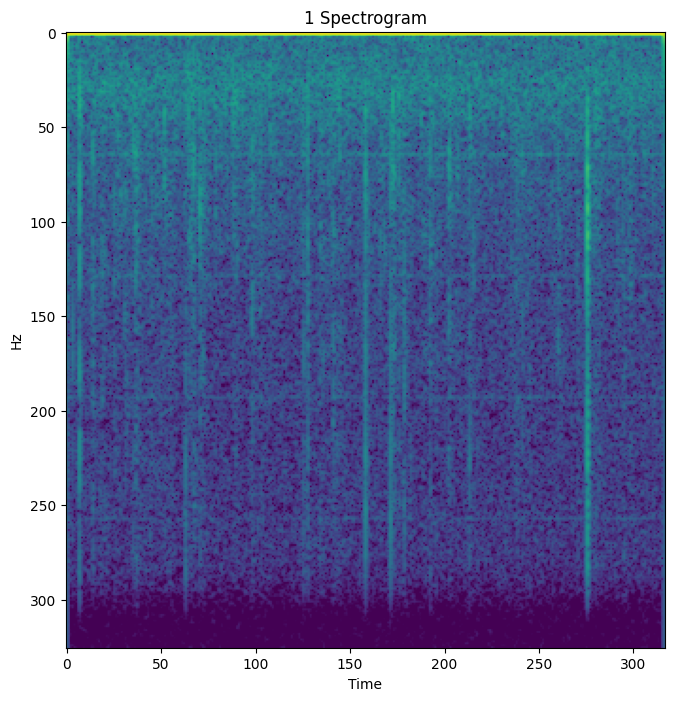

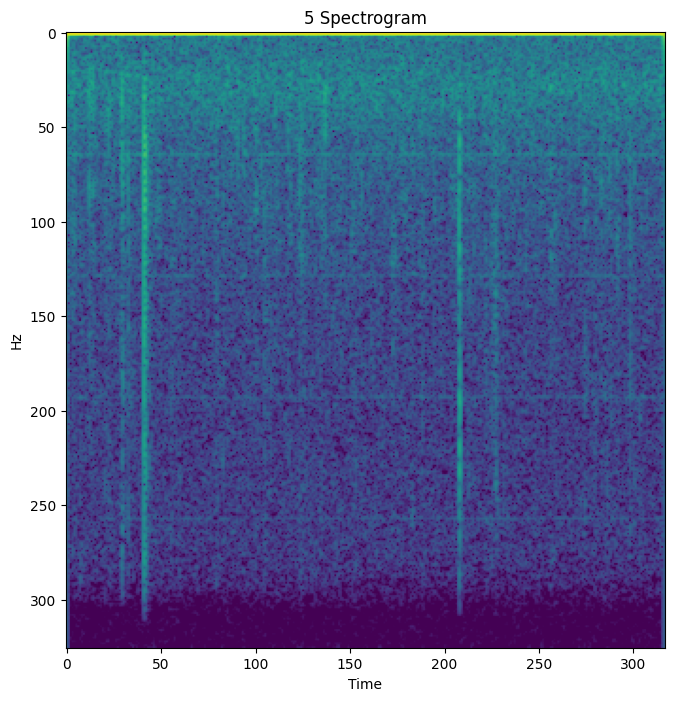

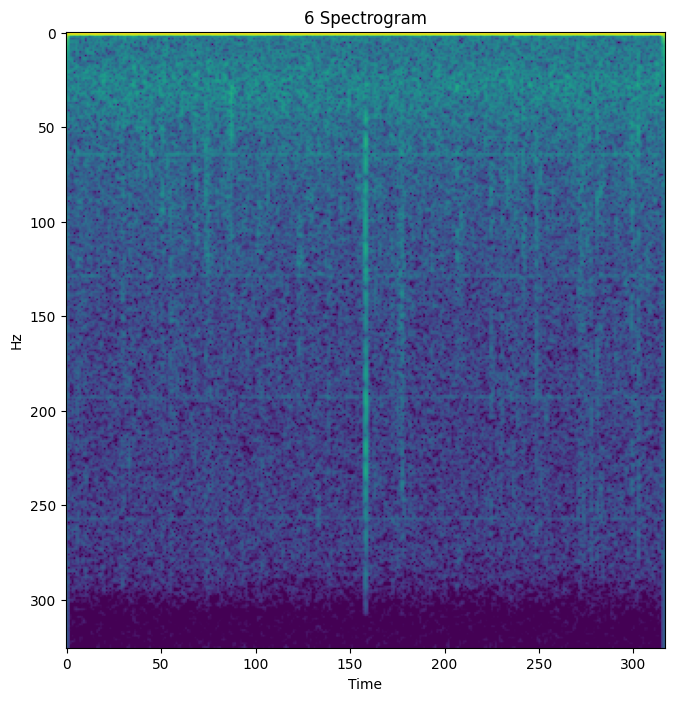

In [6]:
# Création d'une figure avec une taille spécifiée pour visualiser le spectrogramme de resultat0.
plt.figure(figsize=(8, 8))
plt.title('0 Spectrogram')
# Affichage du spectrogramme. Ici, `resultat0[:, :, 0]` extrait la première tranche du canal.
# La fonction imshow est utilisée pour afficher les données sous forme d'image.
plt.imshow(resultat0[:, :, 0])
# Ajout de labels pour les axes X et Y.
plt.xlabel('Time')
plt.ylabel('Hz')
# Affichage de la figure.
plt.show()

# Même processus pour resultat1.
plt.figure(figsize=(8, 8))
plt.title('1 Spectrogram')
plt.imshow(resultat1[:, :, 0])
plt.xlabel('Time')
plt.ylabel('Hz')
plt.show()

# Même processus pour resultat5.
plt.figure(figsize=(8, 8))
plt.title('5 Spectrogram')
plt.imshow(resultat5[:, :, 0])
plt.xlabel('Time')
plt.ylabel('Hz')
plt.show()

# Même processus pour resultat6.
plt.figure(figsize=(8, 8))
plt.title('6 Spectrogram')
plt.imshow(resultat6[:, :, 0])
plt.xlabel('Time')
plt.ylabel('Hz')
plt.show()


In [7]:
import os
import pandas as pd

# Chargement du dataset d'entraînement
# le chemin vers mon dossier de données d'entraînement
train_files = [os.path.join(r'C:\Users\msi\Desktop\M2_Data_Science\Statistique avancé et apprentissage\TraitementaudioProject\Extraire_Sup_files\X_train', file) for file in os.listdir(r'C:\Users\msi\Desktop\M2_Data_Science\Statistique avancé et apprentissage\TraitementaudioProject\Extraire_Sup_files\X_train')]
# Lecture du fichier CSV contenant les labels d'entraînement
data = pd.read_csv("Y_train_ofTdMHi.csv")
# Initialisation des listes pour stocker les caractéristiques et les labels
train_features = []
labels = []

# Index pour parcourir le dataframe 'data'
j = 0

# Boucle sur chaque fichier dans le dossier d'entraînement
for file in train_files:
    # Extraction de la ligne correspondante du dataframe
    datax = data[j:j+1]

    # Vérification si le nom du fichier correspond à l'identifiant dans 'datax'
    if file.split("\\")[-1] == list(datax.id)[0]:
        # Extraction des caractéristiques du fichier audio
        result = extract_features(file)
        # Si l'extraction réussit, ajouter les caractéristiques et le label correspondant aux listes
        if result is not None:
            train_features.append(result)
            labels.append(int(list(datax.pos_label)[0]))
    
    # Incrément de l'index
    j = j + 1


In [8]:
# Conversion de la liste 'train_features' en un tableau numpy
# 'train_features' est une liste de caractéristiques extraites de fichiers audio.
# Cette conversion est utile pour le traitement ultérieur, notamment pour l'entraînement de modèles d'apprentissage automatique.
data_array = np.array(train_features)

# Conversion de la liste 'labels' en un tableau numpy
# 'labels' est une liste contenant les labels associés à chaque ensemble de caractéristiques dans 'train_features'.
# Comme pour 'train_features', la conversion en tableau numpy facilite les manipulations et l'utilisation dans divers algorithmes d'apprentissage.
labels_array = np.array(labels)


In [9]:
import pickle

# Sauvegarde du tableau 'data_array' dans un fichier
# Ouverture du fichier 'data_array.pkl' en mode écriture binaire ('wb')
with open('data_array.pkl', 'wb') as fichier1:
    # Utilisation de pickle pour sérialiser 'data_array' et l'écrire dans le fichier
    # Cela permet de stocker la structure complexe du tableau numpy de manière efficace
    pickle.dump(data_array, fichier1)

# Processus similaire pour sauvegarder 'labels_array'
# Ouverture du fichier 'labels_array.pkl' en mode écriture binaire
with open('labels_array.pkl', 'wb') as fichier1:
    # Sérialisation et sauvegarde de 'labels_array' dans le fichier
    pickle.dump(labels_array, fichier1)



In [10]:







# Chargement de l'ensemble de données de test
test_files = [os.path.join(r'C:\Users\msi\Desktop\M2_Data_Science\Statistique avancé et apprentissage\TraitementaudioProject\Extraire_Sup_files\X_test', file) for file in os.listdir(r'C:\Users\msi\Desktop\M2_Data_Science\Statistique avancé et apprentissage\TraitementaudioProject\Extraire_Sup_files\X_test')]

# Lecture du fichier CSV qui contient les données de test.
test_data = pd.read_csv('sumbit.csv')

# Initialisation d'une liste pour stocker les caractéristiques extraites de test.
test_features = []

# Boucle sur chaque fichier dans le dossier de test.
for file in test_files:
    # Extraction des caractéristiques du fichier audio.
    data = extract_features(file)

    # Vérification si l'extraction a réussi.
    # Si oui, ajouter les caractéristiques extraites à la liste 'test_features'.
    if data is not None:
        test_features.append(data)




In [11]:



# Conversion de la liste 'test_features' en un tableau numpy.
X_test = np.array(test_features)

# Ouverture d'un fichier en mode écriture binaire ('wb') pour la sauvegarde.
with open('X_test.pkl', 'wb') as fichier1:
    pickle.dump(X_test, fichier1)